<a href="https://colab.research.google.com/github/CEJ-Ezenezi/Global-Mortality-Analysis/blob/main/global_mortality_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GLOBAL MORTALITY ANALYSIS - A COMPREHENSIVE STUDY FROM YEAR 1987 TO 2021**

In [8]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
def read_data(csv_filename):
    """reads a csv file into a dataframe
    cleans the dataframe, deletes specified columns of the dataframe as the
    information is irrelevant, filters the required years
    and returns the dataframe.
    """

    #read original csv file into pandas dataframe specifying seperator
    #skip first 5 rows due to irrelevance and set index_col to false
    #to handle extra commas in the  dataset
    df = pd.read_csv(csv_filename,  sep=',', skiprows=5, index_col=False)

    #drop irrelevant columns
    df = df.drop(['Region Code', 'Country Code', 'Age group code',
        'Age-standardized death rate per 100 000 standard population'], axis=1)

    #drop rows with nan values
    df = df.dropna()

    #filter years of interest
    df = df[(df['Year'] >= 1987) & (df['Year'] <= 2021)]

    return df



In [11]:
#calling the read_data function
com_deaths = read_data("/content/drive/MyDrive/Communicable_maternal_perinatal_nutritional_conditions.csv")
com_deaths.head(20)

,Region Name,Country Name,Year,Sex,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
0,Europe,Albania,1987,All,[All],2994.0,17.280388,97.331036
1,Europe,Albania,1987,All,[0],1421.0,57.787719,1763.027295
2,Europe,Albania,1987,All,[1-4],656.0,53.117409,229.370629
3,Europe,Albania,1987,All,[5-9],36.0,17.821782,10.807565
4,Europe,Albania,1987,All,[10-14],21.0,15.555556,6.643467
5,Europe,Albania,1987,All,[15-19],23.0,11.917098,7.409794
6,Europe,Albania,1987,All,[20-24],22.0,8.118081,7.529090
7,Europe,Albania,1987,All,[25-29],28.0,11.715481,9.728978
8,Europe,Albania,1987,All,[30-34],30.0,13.274336,12.310217
9,Europe,Albania,1987,All,[35-39],15.0,7.575758,8.138904


In [12]:
ill_deaths = read_data('/content/drive/MyDrive/Ill_defined diseases.csv')
ill_deaths.head(20)

,Region Name,Country Name,Year,Sex,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
1,Europe,Albania,1987,All,[85+],523.0,23.495058,5230.000000
2,Europe,Albania,1987,All,[80-84],296.0,18.059793,1783.132530
3,Europe,Albania,1987,All,[75-79],287.0,13.569740,931.818182
4,Europe,Albania,1987,All,[70-74],199.0,11.018826,487.745098
5,Europe,Albania,1987,All,[65-69],131.0,9.472162,202.472952
6,Europe,Albania,1987,All,[60-64],91.0,8.593012,117.571059
7,Europe,Albania,1987,All,[55-59],64.0,7.891492,64.516129
8,Europe,Albania,1987,All,[50-54],45.0,8.771930,37.406484
9,Europe,Albania,1987,All,[45-49],63.0,15.989848,44.366197
10,Europe,Albania,1987,All,[40-44],29.0,13.063063,20.684736


In [13]:
injuries_deaths = read_data("/content/drive/MyDrive/Injuries.csv")
injuries_deaths.head()

,Region Name,Country Name,Year,Sex,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
1,Europe,Albania,1987,All,[85+],10.0,0.449236,100.000000
2,Europe,Albania,1987,All,[80-84],2.0,0.122026,12.048193
3,Europe,Albania,1987,All,[75-79],13.0,0.614657,42.207792
4,Europe,Albania,1987,All,[70-74],17.0,0.941307,41.666667
5,Europe,Albania,1987,All,[65-69],17.0,1.229212,26.275116


In [14]:
noncom_deaths = read_data("/content/drive/MyDrive/Noncommunicable diseases.csv")
noncom_deaths.head()

,Region Name,Country Name,Year,Sex,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
1,Europe,Albania,1987,All,[85+],1522.0,68.373765,15220.000000
2,Europe,Albania,1987,Male,[All],5981.0,62.069323,377.540715
3,Europe,Albania,1987,Male,[20-24],47.0,25.683060,31.125828
4,Europe,Albania,1987,Male,[25-29],53.0,37.857143,35.690236
5,Europe,Albania,1987,Male,[30-34],56.0,41.791045,44.515103


Let's then carry out some summary statistics on the four different dataframes

let's merge the four dataframes into one for efficiency

In [15]:
#merge on common columns
common_cols = ['Region Name', 'Country Name', 'Year', 'Sex', 'Age Group']

# Perform successive merges
merged_df = pd.merge(com_deaths, ill_deaths, on=common_cols, suffixes=('_com', '_ill'))
merged_df = pd.merge(merged_df, injuries_deaths, on=common_cols, suffixes=('', '_injuries'))
merged_deaths_df = pd.merge(merged_df, noncom_deaths, on=common_cols, suffixes=('', '_noncom'))

merged_deaths_df.head()

,Region Name,Country Name,Year,Sex,Age Group,Number_com,Percentage of cause-specific deaths out of total deaths_com,Death rate per 100 000 population_com,Number_ill,Percentage of cause-specific deaths out of total deaths_ill,Death rate per 100 000 population_ill,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population,Number_noncom,Percentage of cause-specific deaths out of total deaths_noncom,Death rate per 100 000 population_noncom
0,Europe,Albania,1987,All,[All],2994.0,17.280388,97.331036,2913.0,16.812882,94.697832,736.0,4.247951,23.926400,10683.0,61.658779,347.290400
1,Europe,Albania,1987,All,[0],1421.0,57.787719,1763.027295,627.0,25.498170,777.915633,41.0,1.667344,50.868486,370.0,15.046767,459.057072
2,Europe,Albania,1987,All,[1-4],656.0,53.117409,229.370629,247.0,20.000000,86.363636,77.0,6.234818,26.923077,255.0,20.647773,89.160839
3,Europe,Albania,1987,All,[5-9],36.0,17.821782,10.807565,71.0,35.148515,21.314920,44.0,21.782178,13.209246,51.0,25.247525,15.310718
4,Europe,Albania,1987,All,[10-14],21.0,15.555556,6.643467,45.0,33.333333,14.236001,34.0,25.185185,10.756090,35.0,25.925926,11.072445


In [16]:
merged_deaths_df.describe()

,Year,Number_com,Percentage of cause-specific deaths out of total deaths_com,Death rate per 100 000 population_com,Number_ill,Percentage of cause-specific deaths out of total deaths_ill,Death rate per 100 000 population_ill,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population,Number_noncom,Percentage of cause-specific deaths out of total deaths_noncom,Death rate per 100 000 population_noncom
count,184039.000000,184039.000000,184039.000000,184039.000000,184039.000000,184039.000000,184039.000000,184039.00000,184039.000000,184039.000000,1.840390e+05,184039.000000,184039.000000
mean,2004.326137,1088.627400,11.332250,186.954721,652.837138,5.161307,166.388695,996.30869,20.156154,81.700485,9.843482e+03,63.202427,1707.243915
std,9.591524,6711.744231,14.872756,509.317874,4384.662589,7.466844,737.739817,6516.83985,21.268214,133.274336,5.816124e+04,24.578846,3517.179830
min,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1996.000000,8.000000,2.992958,5.202570,2.000000,0.744048,1.391779,16.00000,3.233555,17.459187,5.900000e+01,42.806429,29.240873
50%,2005.000000,49.000000,6.153846,26.807930,20.000000,2.680637,8.385744,89.00000,10.536806,43.425492,4.360000e+02,67.761194,244.318182
75%,2012.000000,298.000000,12.727273,112.083274,132.000000,6.666667,45.066892,377.00000,33.333333,95.742390,2.972000e+03,85.555556,1338.243544
max,2021.000000,560993.000000,100.000000,9998.846287,180870.000000,100.000000,24675.324675,368365.00000,100.000000,12376.237624,2.658375e+06,100.000000,50000.000000


**EXPLORATORY DATA ANALYSIS**

*Let's carry out a trend analysis on the total death rates across the regions of the world*

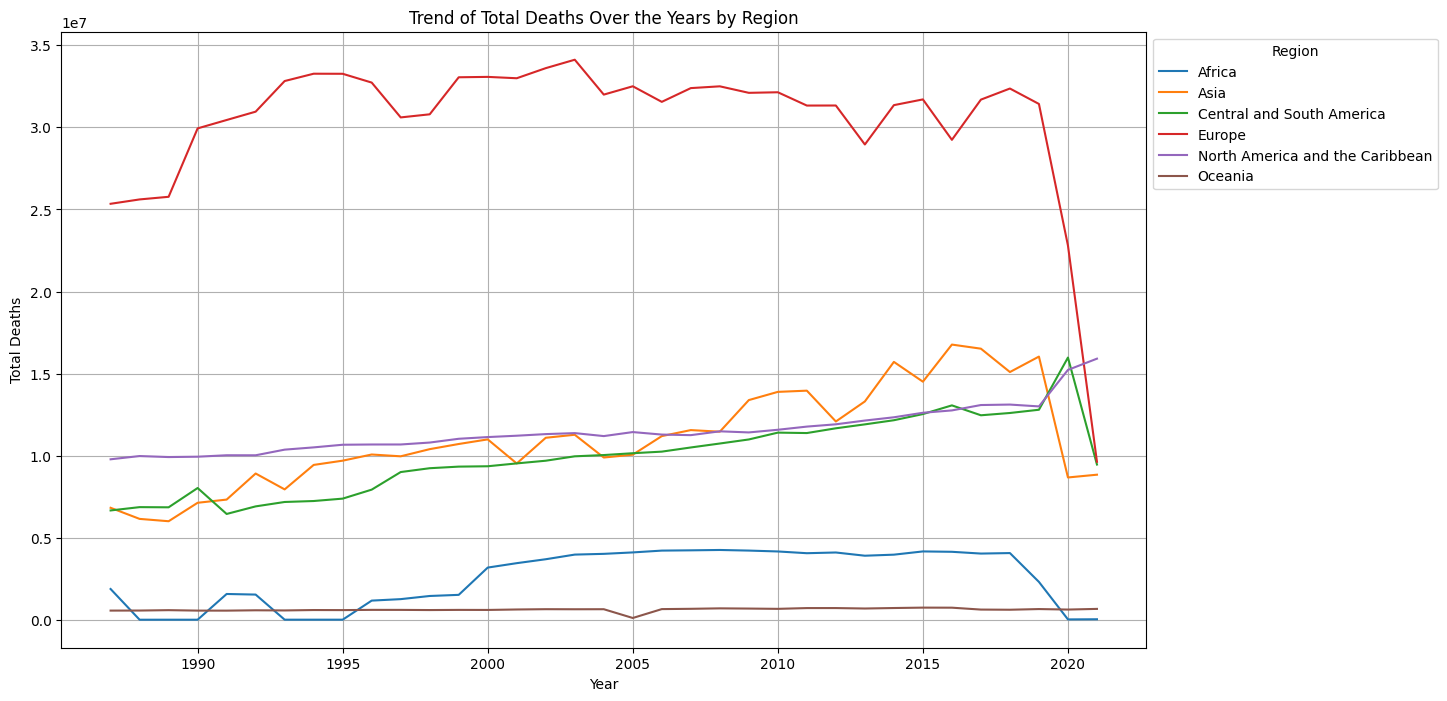

In [17]:
# Step 1:create a new column total deaths that adds the number of deaths rowwise
merged_deaths_df['Total_Deaths'] = merged_deaths_df['Number_com'] + \
                   merged_deaths_df['Number_ill'] + merged_deaths_df['Number'] \
                   + merged_deaths_df['Number_noncom']
#aggregate the data by Region and Year, summing up the total deaths
region_trend = merged_deaths_df.groupby(['Region Name', 'Year']) \
                  ['Total_Deaths'].sum().reset_index()

# Step 2: Pivot the data to have years as columns and regions as rows
region_pivot = region_trend.pivot(index='Year', columns='Region Name', values='Total_Deaths')

# Step 3: Plot the trend over the years for each region
plt.figure(figsize=(14, 8))
for region in region_pivot.columns:
    plt.plot(region_pivot.index, region_pivot[region], label=region)

plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Trend of Total Deaths Over the Years by Region')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


we see from the trend above that there is a noticeable gap with more deaths recorded in the Europe region over the years, having the most death rate in the year 2003 of approximately 3.4 million deaths.
We will further investigate the Europe region to see countries contributing most to the total number of deaths in that region.

*let us now investigate the trend of total deaths for each of the group cause of death across the regions of the world.*

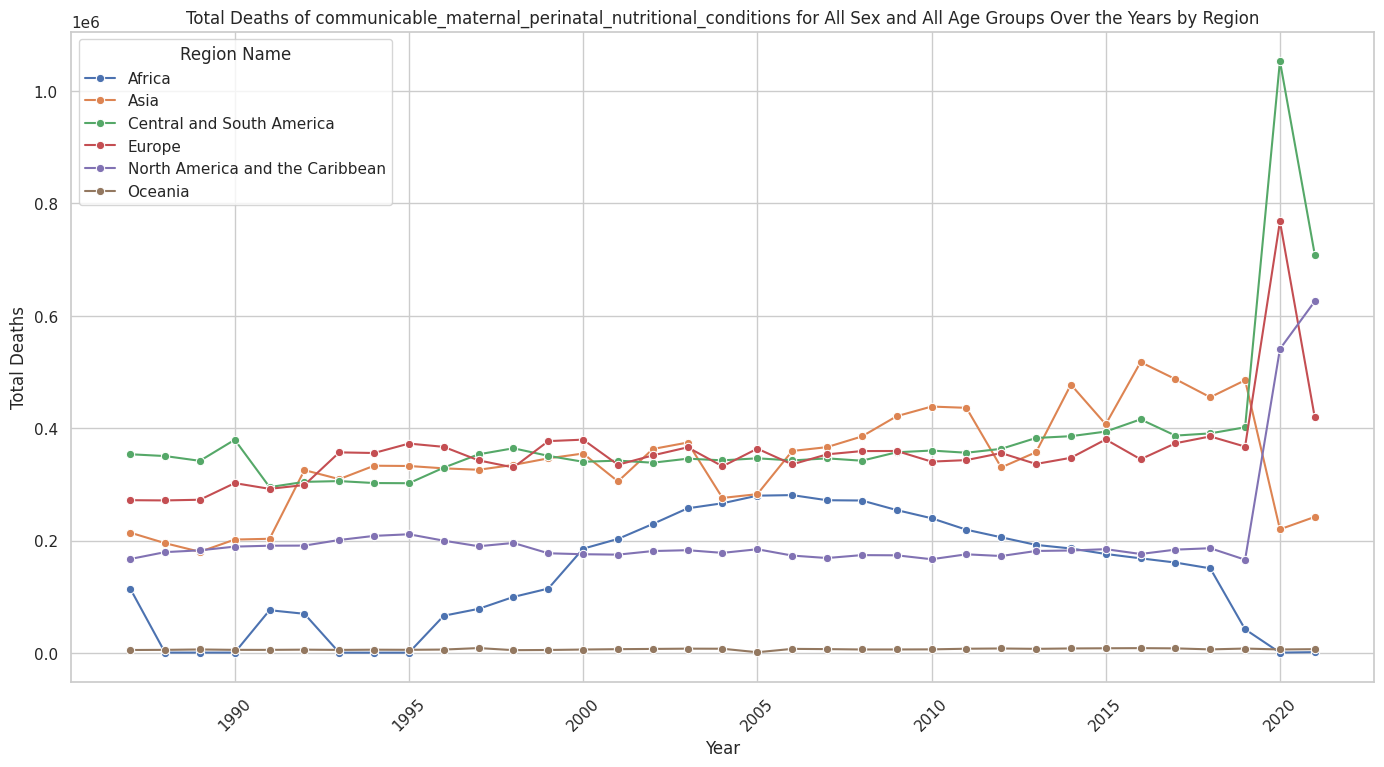

In [18]:
# Filter rows where Sex is "All" and Age group is "Age_all"
filtered_data = merged_deaths_df[(merged_deaths_df['Sex'] == 'All') & (merged_deaths_df['Age Group'] == '[All]')]

# Group by Region Name and Year, then sum the Number of deaths
grouped_data = filtered_data.groupby(['Region Name', 'Year'])['Number_com'].sum().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='Year', y='Number_com', hue='Region Name', marker='o')

# Customize the plot
plt.title('Total Deaths of communicable_maternal_perinatal_nutritional_conditions for All Sex and All Age Groups Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Region Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

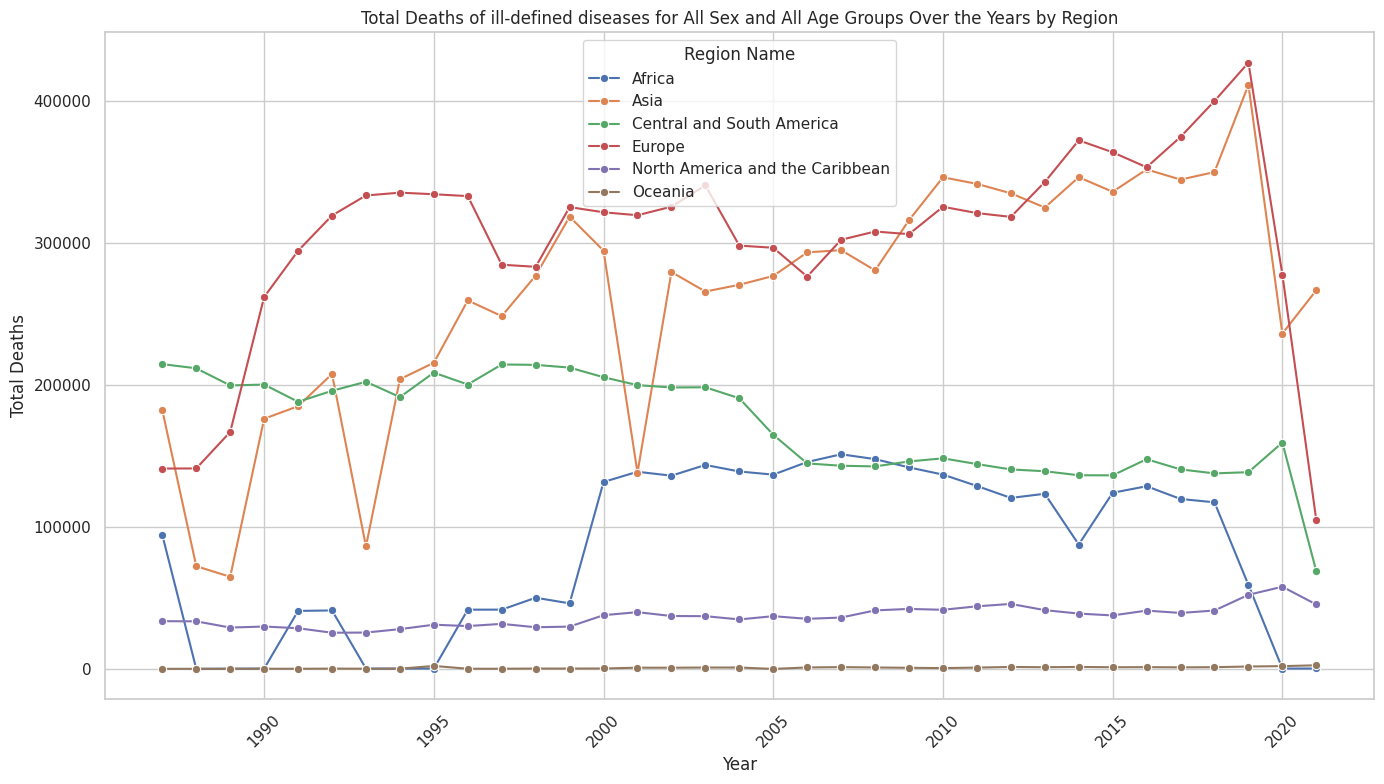

In [19]:
# Group by Region Name and Year, then sum the Number of deaths
grouped_data = filtered_data.groupby(['Region Name', 'Year'])['Number_ill'].sum().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='Year', y='Number_ill', hue='Region Name', marker='o')

# Customize the plot
plt.title('Total Deaths of ill-defined diseases for All Sex and All Age Groups Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Region Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

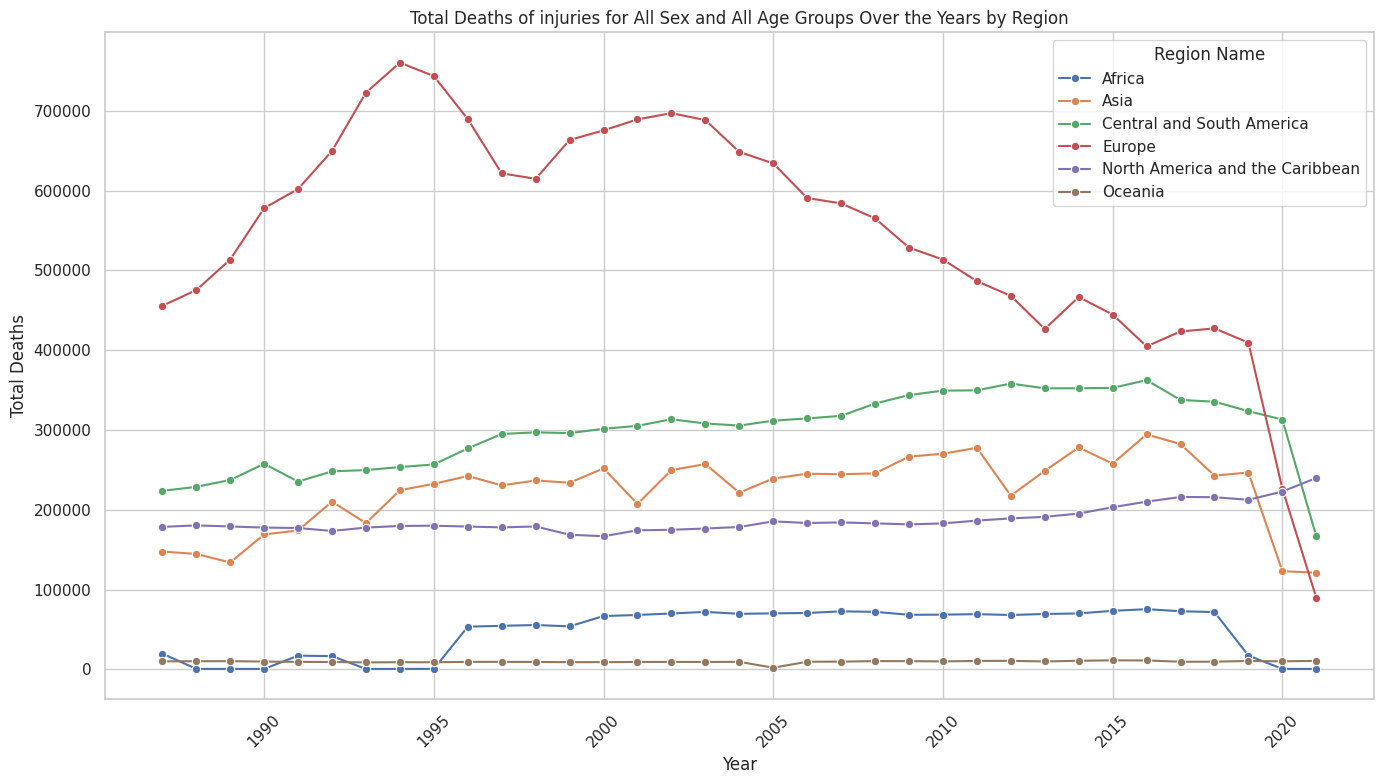

In [20]:
# Group by Region Name and Year, then sum the Number of deaths
grouped_data = filtered_data.groupby(['Region Name', 'Year'])['Number'].sum().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='Year', y='Number', hue='Region Name', marker='o')

# Customize the plot
plt.title('Total Deaths of injuries for All Sex and All Age Groups Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Region Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

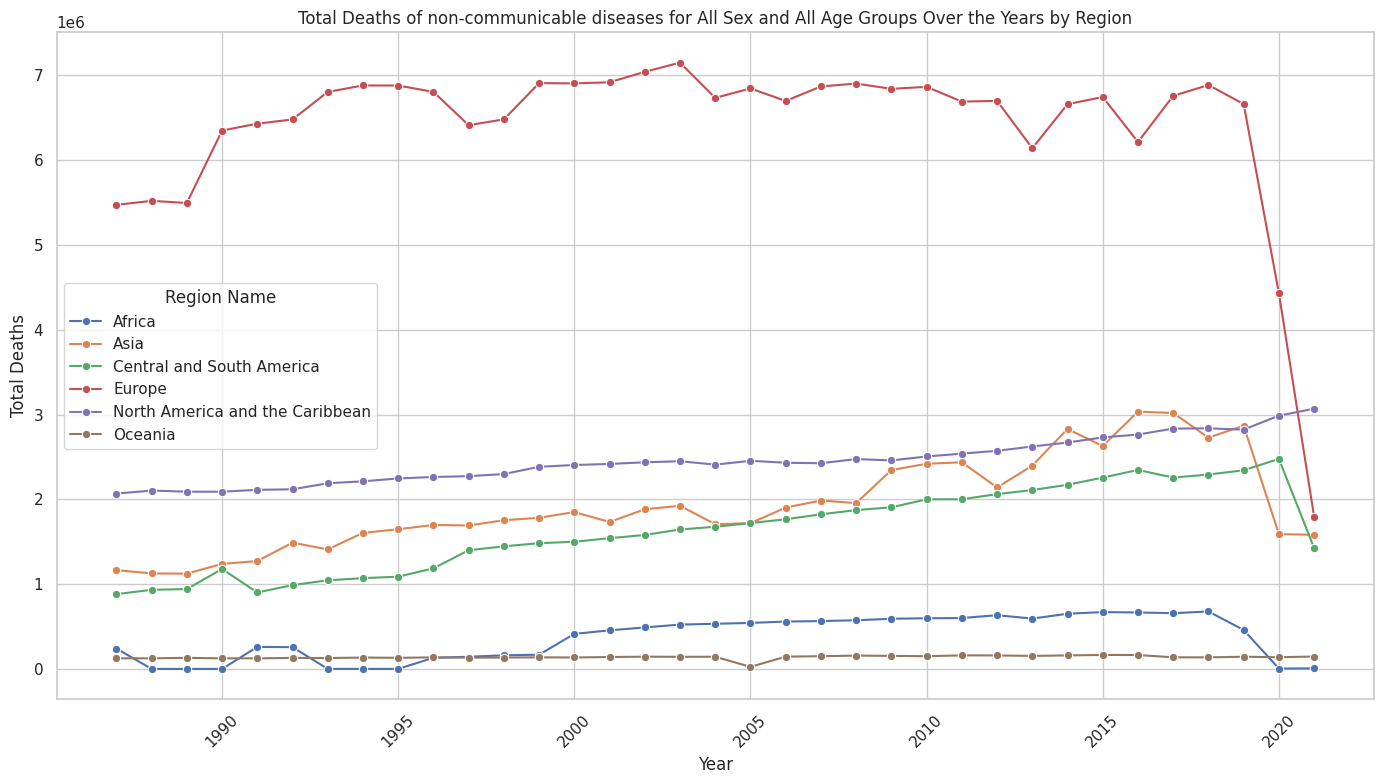

In [21]:
# Group by Region Name and Year, then sum the Number of deaths
grouped_data = filtered_data.groupby(['Region Name', 'Year'])['Number_noncom'].sum().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='Year', y='Number_noncom', hue='Region Name', marker='o')

# Customize the plot
plt.title('Total Deaths of non-communicable diseases for All Sex and All Age Groups Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Region Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

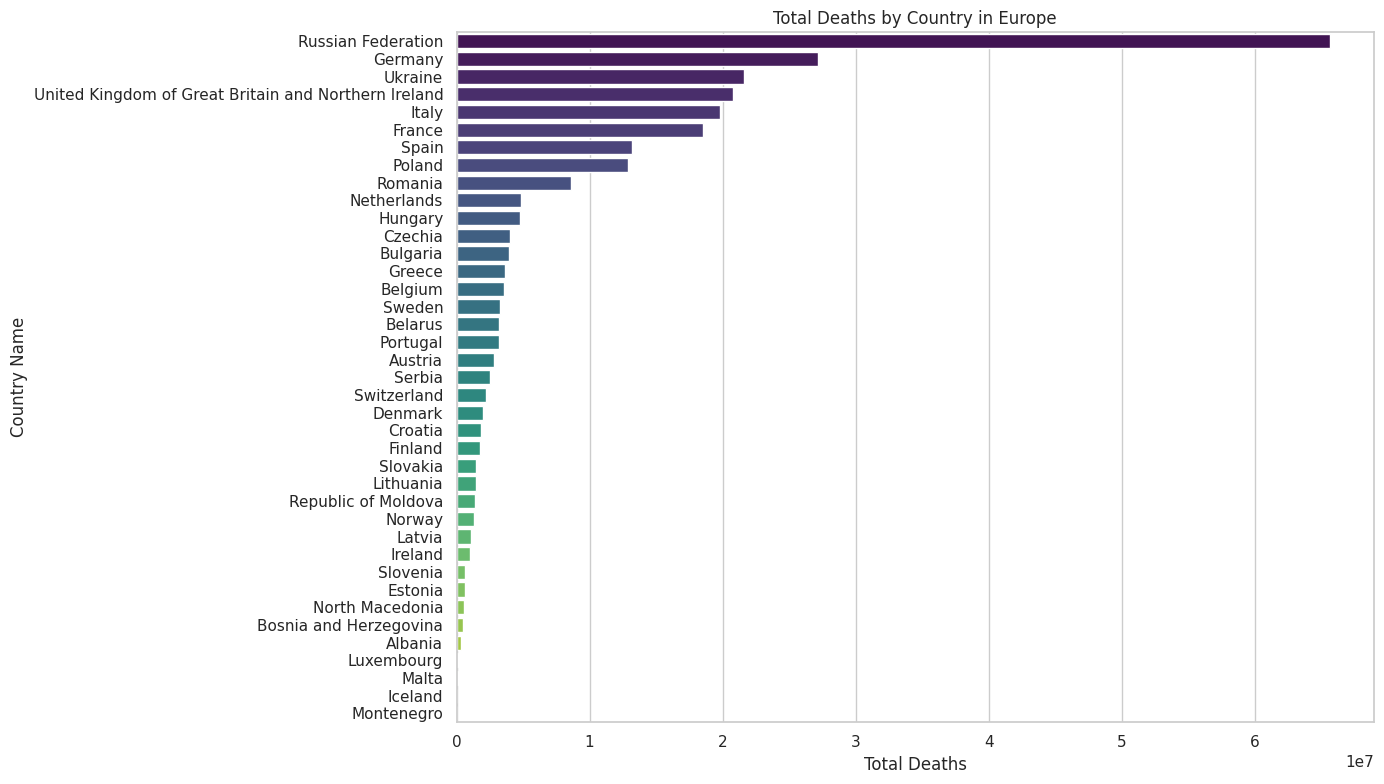

In [22]:

# Filter the merged data for the Europe region
europe_deaths_data = filtered_data[filtered_data['Region Name'] == 'Europe']

# Group by Country Code and sum the number of deaths
country_deaths = europe_deaths_data.groupby('Country Name')['Total_Deaths'].sum().reset_index()

# Sort the data to highlight the most affected country
country_deaths = country_deaths.sort_values(by='Total_Deaths', ascending=False)

sns.set(style="whitegrid")

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=country_deaths, y='Country Name', x='Total_Deaths', hue='Country Name', palette='viridis', legend=False)

# Customize the plot
plt.title('Total Deaths by Country in Europe')
plt.xlabel('Total Deaths')
plt.ylabel('Country Name')
plt.tight_layout()

# Show the plot
plt.show()

*Now let's analyse the deaths in each region by the four cause of death groups*

In [23]:
# Summarize the data by year and region for each health condition
summary_df = merged_deaths_df.groupby(['Year', 'Region Name']).agg({
    'Death rate per 100 000 population_com': 'sum',
    'Death rate per 100 000 population_ill': 'sum',
    'Death rate per 100 000 population': 'sum',
    'Death rate per 100 000 population_noncom': 'sum'
}).reset_index()

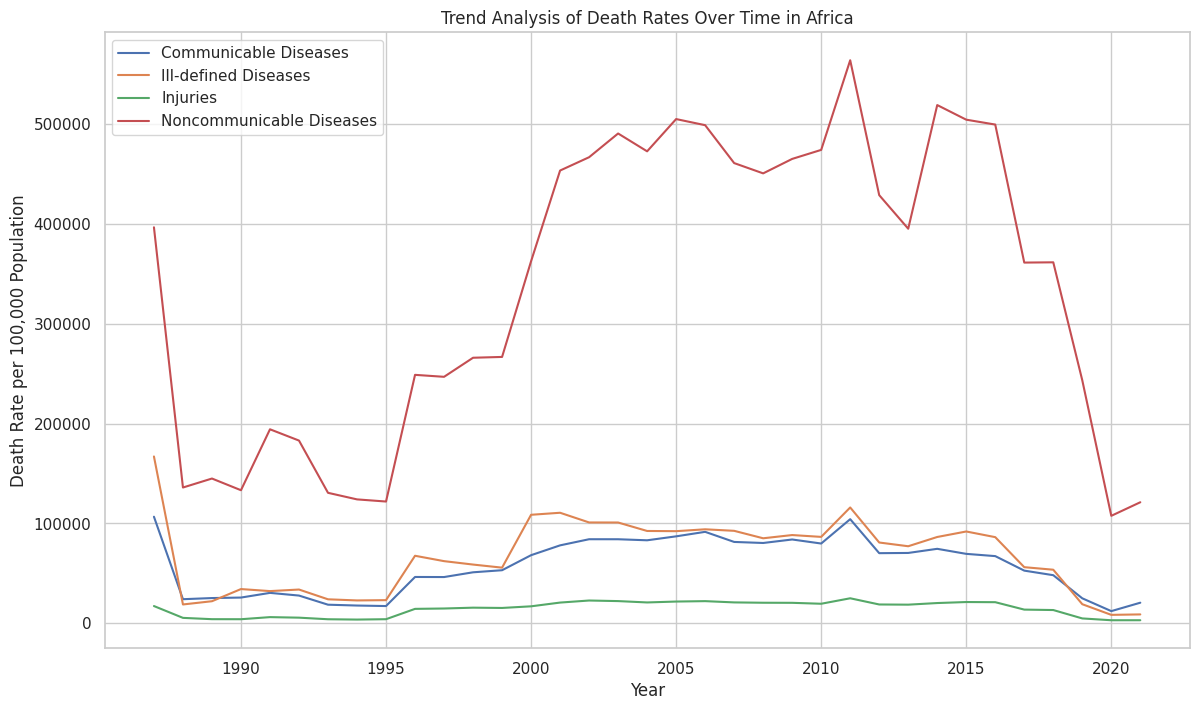

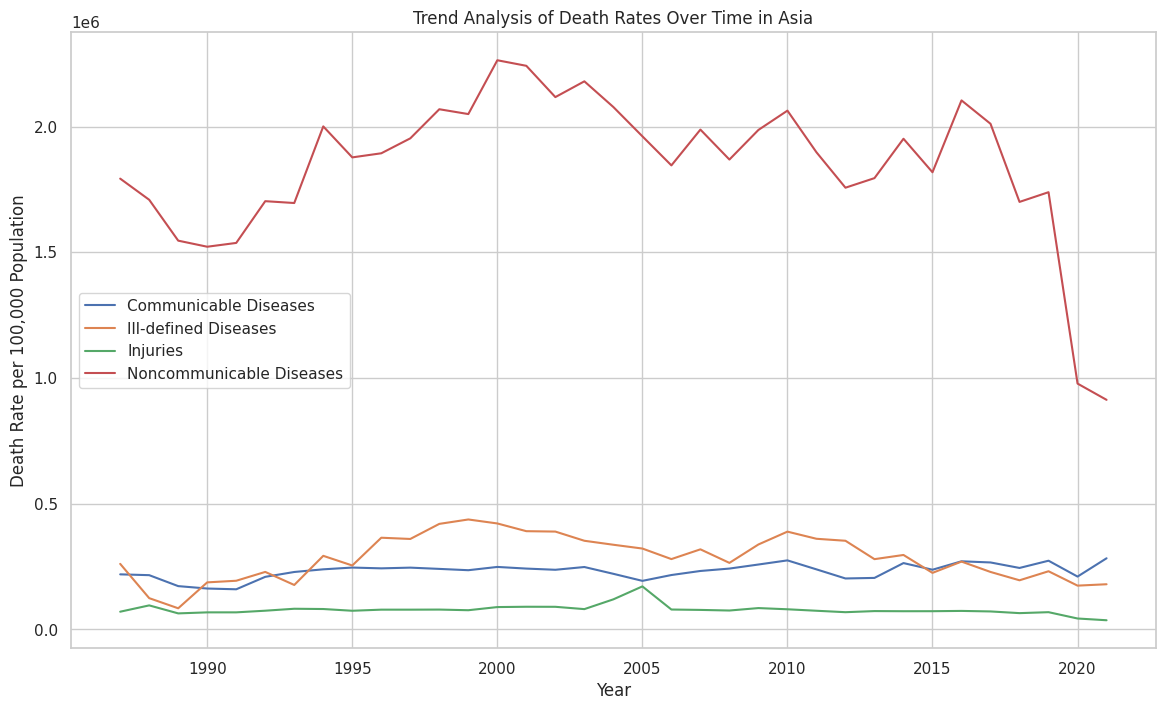

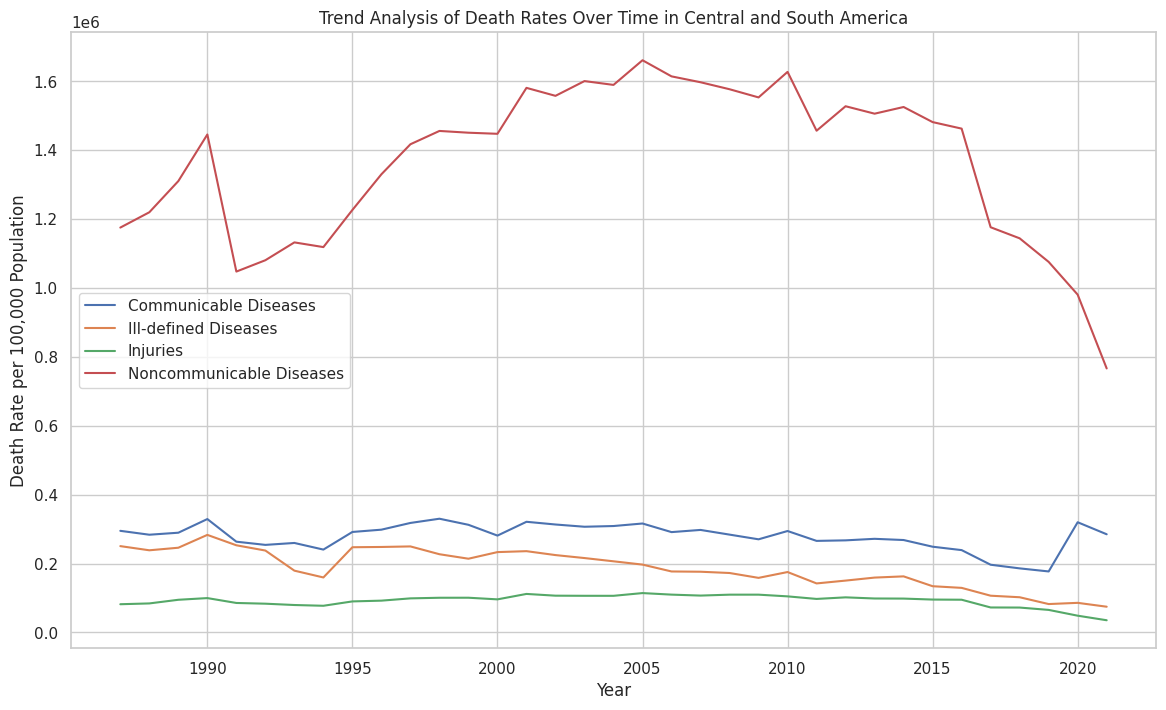

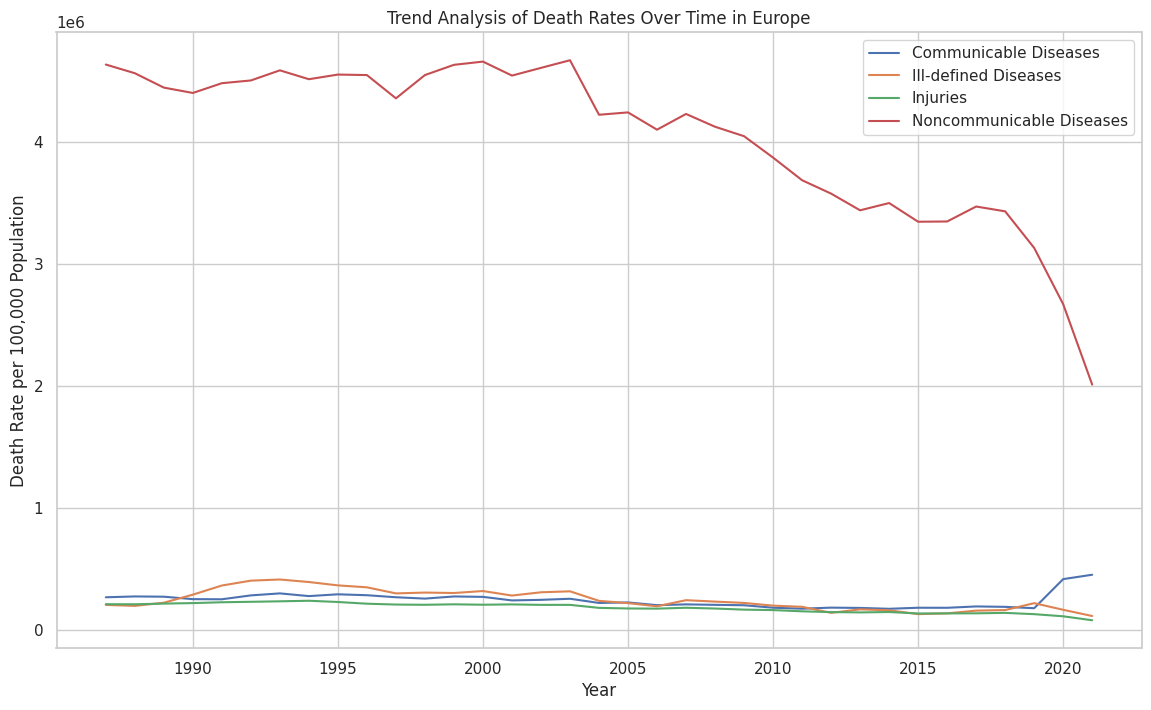

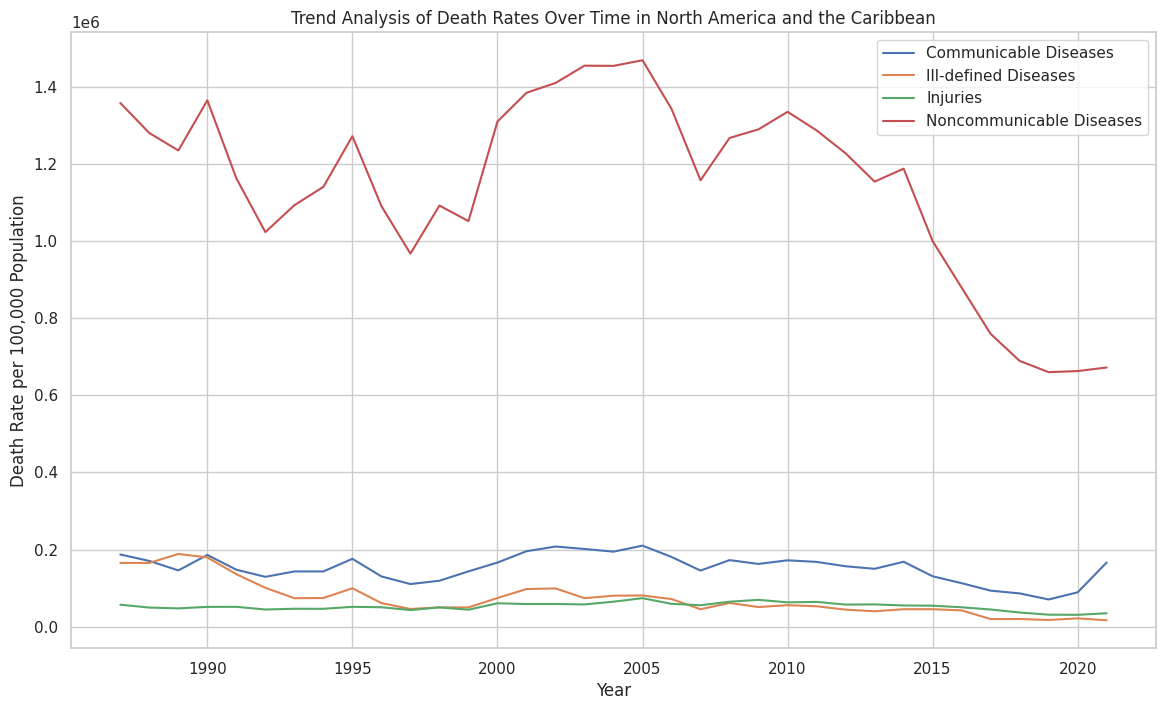

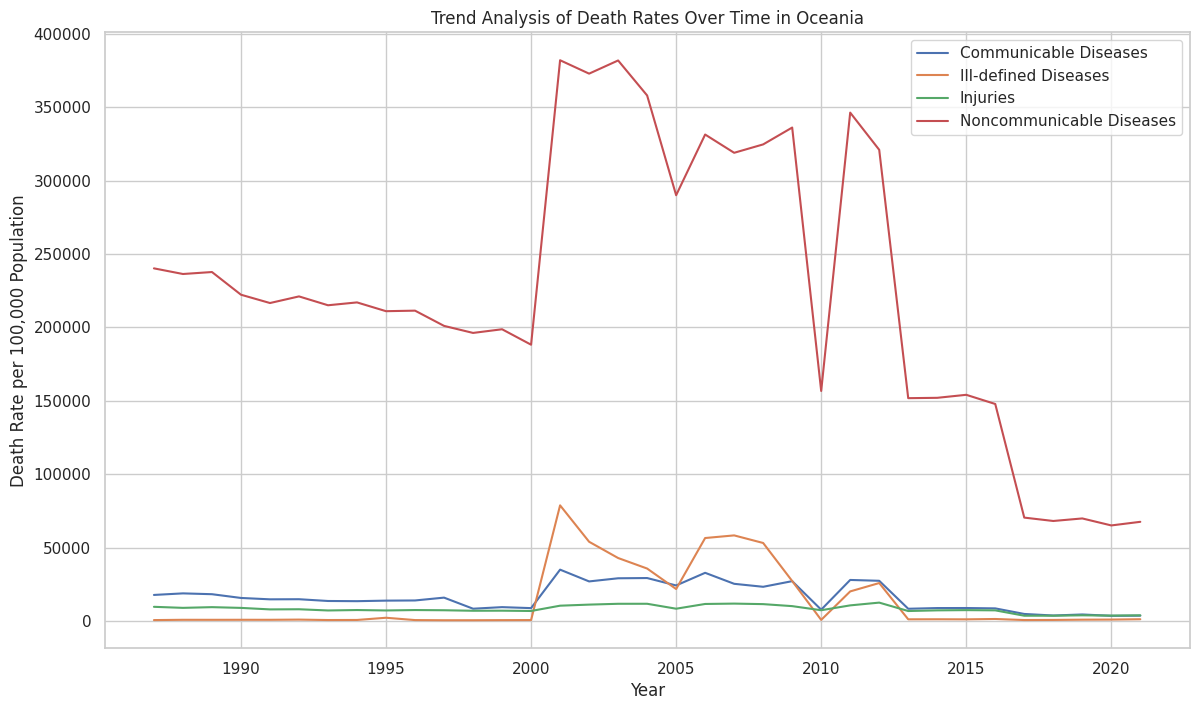

In [24]:
def plot_trends(data, region):
    plt.figure(figsize=(14, 8))

    plt.plot(data['Year'], data['Death rate per 100 000 population_com'], label='Communicable Diseases')
    plt.plot(data['Year'], data['Death rate per 100 000 population_ill'], label='Ill-defined Diseases')
    plt.plot(data['Year'], data['Death rate per 100 000 population'], label='Injuries')
    plt.plot(data['Year'], data['Death rate per 100 000 population_noncom'], label='Noncommunicable Diseases')

    plt.title(f'Trend Analysis of Death Rates Over Time in {region}')
    plt.xlabel('Year')
    plt.ylabel('Death Rate per 100,000 Population')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot trends for each region
regions = summary_df['Region Name'].unique()

for region in regions:
    region_data = summary_df[summary_df['Region Name'] == region]
    plot_trends(region_data, region)

from the above trends we see that non-communicable diseases group happen to be a major cause of death in all regions.

<ipython-input-25-3b72c88f7b79>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_deaths, y='Country Name', x='Number_noncom', palette='viridis')


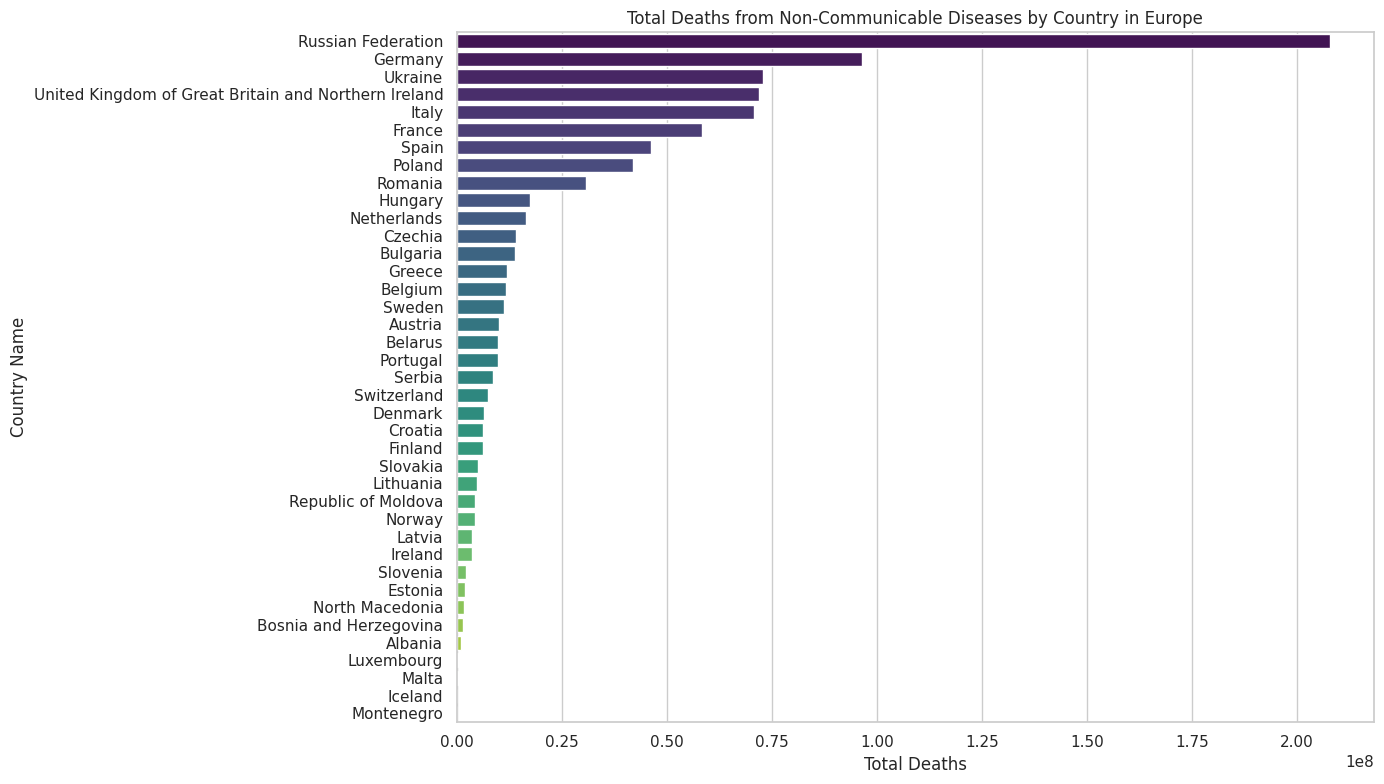

In [25]:

# Filter the merged data for the Europe region
europe_deaths_data = merged_deaths_df[merged_deaths_df['Region Name'] == 'Europe']

# Group by Country Name and sum the number of deaths
country_deaths = europe_deaths_data.groupby('Country Name')['Number_noncom'].sum().reset_index()

# Sort the data to highlight the most affected country
country_deaths = country_deaths.sort_values(by='Number_noncom', ascending=False)

# Set the plot style
sns.set(style="whitegrid")

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=country_deaths, y='Country Name', x='Number_noncom', palette='viridis')

# Customize the plot
plt.title('Total Deaths from Non-Communicable Diseases by Country in Europe')
plt.xlabel('Total Deaths')
plt.ylabel('Country Name')
plt.tight_layout()

# Show the plot
plt.show()


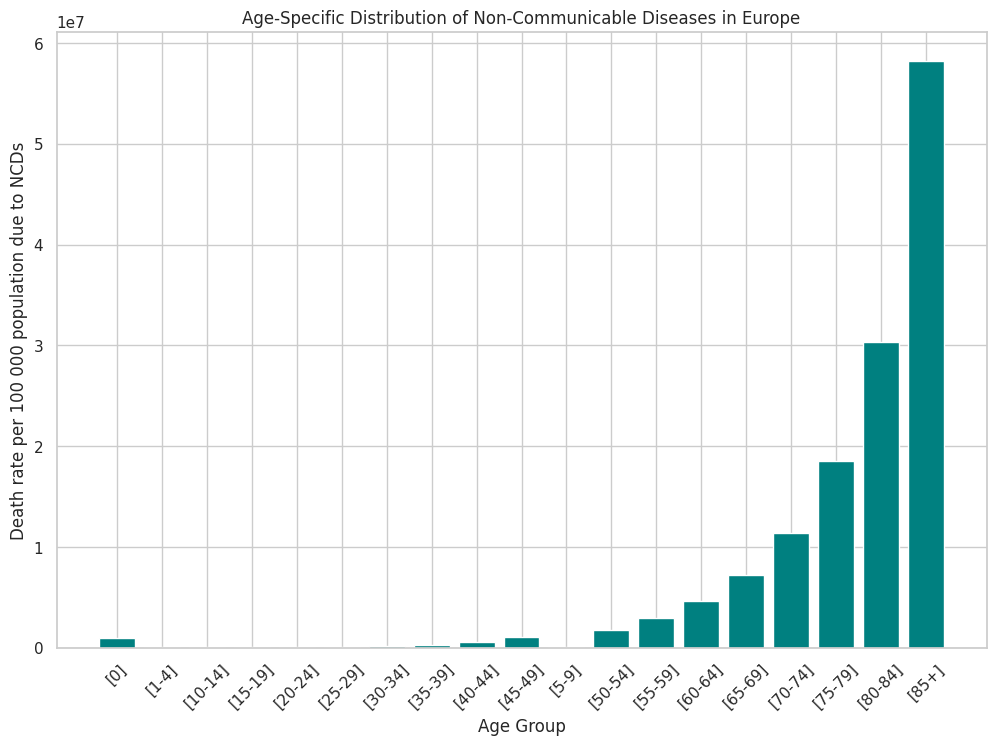

In [26]:
# Assuming you have loaded your dataset into a DataFrame named df

# Step 1: Filter the data for Europe and non-communicable diseases
europe_ncds = merged_deaths_df[(merged_deaths_df['Region Name'] == 'Europe') & (merged_deaths_df['Age Group'] != '[All]')]

# Step 2: Aggregate the data by Age Group
# You can use 'Number_noncom' for counting deaths or 'Death rate per 100 000 population_noncom' for rates
age_group_data = europe_ncds.groupby('Age Group')['Death rate per 100 000 population_noncom'].sum().reset_index()

# Step 3: Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(age_group_data['Age Group'], age_group_data['Death rate per 100 000 population_noncom'], color='teal')
plt.xlabel('Age Group')
plt.ylabel('Death rate per 100 000 population due to NCDs')
plt.title('Age-Specific Distribution of Non-Communicable Diseases in Europe')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()


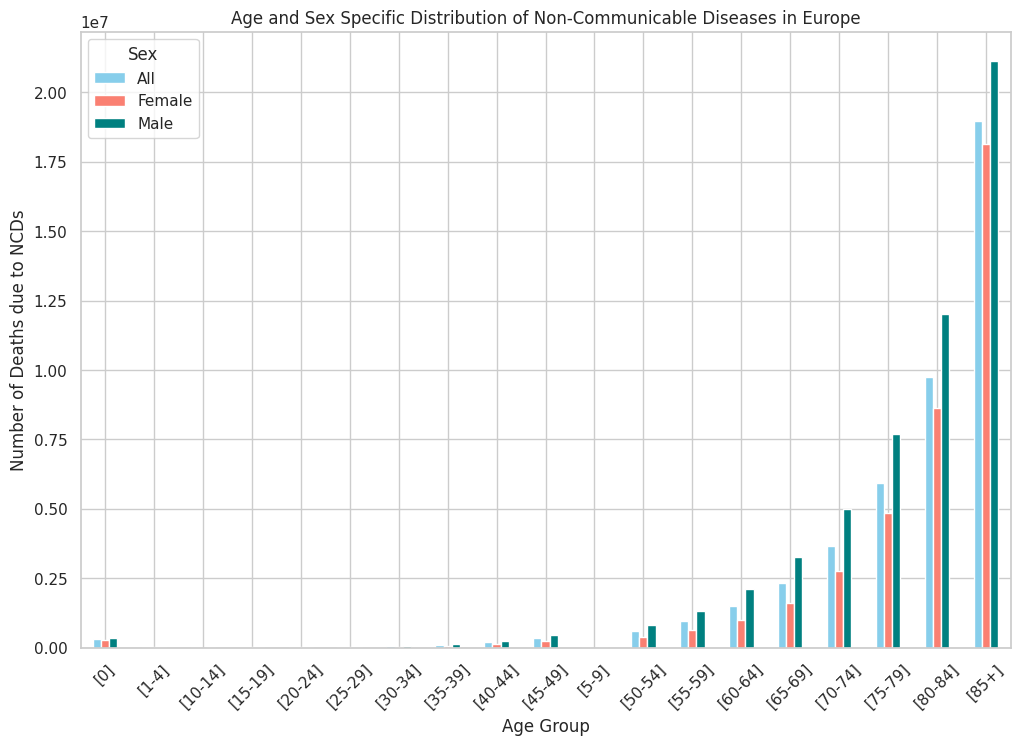

In [27]:
# Step 2: Aggregate the data by Age Group and Sex
# Summing up 'Number_noncom' for counting deaths or 'Death rate per 100 000 population_noncom' for rates
age_sex_data = europe_ncds.groupby(['Age Group', 'Sex'])['Death rate per 100 000 population_noncom'].sum().unstack()

# Step 3: Create a multiple bar chart
fig, ax = plt.subplots(figsize=(12, 8))
age_sex_data.plot(kind='bar', ax=ax, color=['skyblue', 'salmon', 'teal'])
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Deaths due to NCDs')
ax.set_title('Age and Sex Specific Distribution of Non-Communicable Diseases in Europe')
ax.legend(title='Sex')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()


<ipython-input-29-62f6dd831c96>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


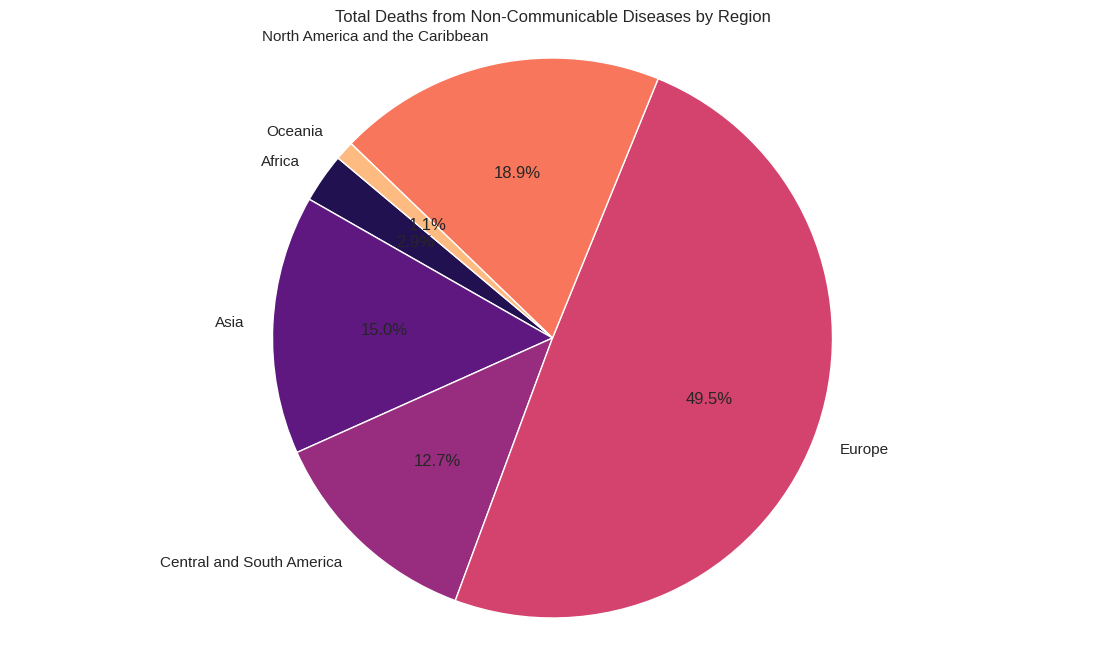

In [29]:
# Filter the merged data for non-communicable diseases
noncom_deaths_data = merged_deaths_df[['Region Name', 'Year', 'Number_noncom']]

# Group by Region Name and sum the number of deaths
region_noncom_deaths = noncom_deaths_data.groupby('Region Name')['Number_noncom'].sum().reset_index()

# Set the plot style
plt.style.use('seaborn-whitegrid')

# Create the pie chart
plt.figure(figsize=(14, 8))
plt.pie(region_noncom_deaths['Number_noncom'],
        labels=region_noncom_deaths['Region Name'], autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('magma',
        len(region_noncom_deaths)))

# Customize the plot
plt.title('Total Deaths from Non-Communicable Diseases by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


<ipython-input-35-866e5228f49c>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


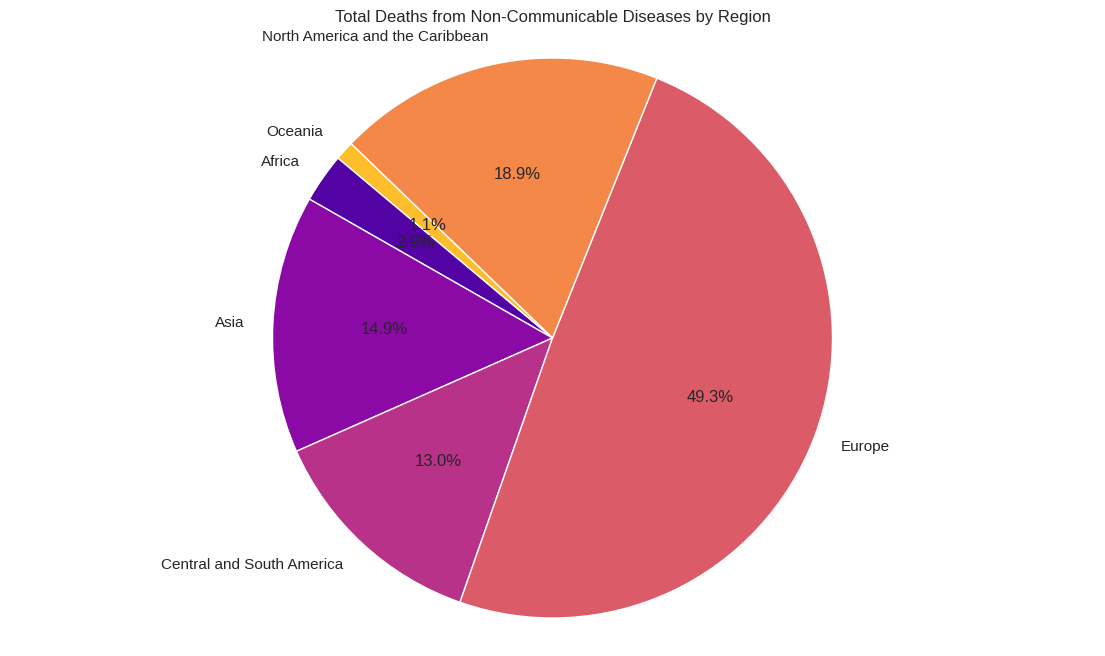

In [35]:
# Filter the merged data for non-communicable diseases
noncom_deaths_data = noncom_deaths[['Region Name', 'Year', 'Number']]

# Group by Region Name and sum the number of deaths
region_noncom_deaths = noncom_deaths_data.groupby('Region Name')['Number'].sum().reset_index()

# Set the plot style
plt.style.use('seaborn-whitegrid')

# Create the pie chart
plt.figure(figsize=(14, 8))
plt.pie(region_noncom_deaths['Number'], labels=region_noncom_deaths['Region Name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma', len(region_noncom_deaths)))

# Customize the plot
plt.title('Total Deaths from Non-Communicable Diseases by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [31]:
num_com = np.array(filtered_data['Number_com'])
num_ill = np.array(filtered_data['Number_ill'])
num_injuries = np.array(filtered_data['Number'])
num_noncom = np.array(filtered_data['Number_noncom'])

np.array(num_injuries)



array([ 736.,  772.,  841., ..., 5148., 5134., 9957.])

In [32]:
import scipy.stats as stats
# Perform the ANOVA
stats.f_oneway(num_com, num_ill, num_injuries, num_noncom)

F_onewayResult(statistic=539.1391639725505, pvalue=0.0)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Step 1: Data Preparation
# Select relevant features and the target variable
features = ['Region Name', 'Country Name', 'Year', 'Sex', 'Age Group', 'Number_com', 'Number_ill', 'Number', 'Number_noncom']
target = 'Total_Deaths'  # Assuming this is your target variable

X = merged_deaths_df[features]
y = merged_deaths_df[target]

# Step 2: Preprocessing Pipeline
# Handle categorical variables with OneHotEncoder and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Number_com', 'Number_ill', 'Number', 'Number_noncom']),
        ('cat', OneHotEncoder(), ['Region Name', 'Country Name', 'Sex', 'Age Group'])
    ])

# Step 3: Multiple Linear Regression Model
model = LinearRegression()

# Create a pipeline that includes the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train the model
pipeline.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate the Model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Multiple Linear Regression - RMSE: {rmse:.2f}, R²: {r2:.2f}")

# (Optional) Step 7: Model Interpretation
# Print the coefficients and intercept
model_coefficients = pipeline.named_steps['model'].coef_
model_intercept = pipeline.named_steps['model'].intercept_
print(f"Intercept: {model_intercept}")
print(f"Coefficients: {model_coefficients}")


In [ ]:
# 1. Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Death Rates')
plt.ylabel('Predicted Death Rates')
plt.title('Actual vs Predicted Death Rates')
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Death Rates')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Death Rates')
plt.show()

ANOVA F-statistic: 539.14, p-value: 0.00000
We reject the null hypothesis - there is a significant difference in the mean number of deaths across causes.


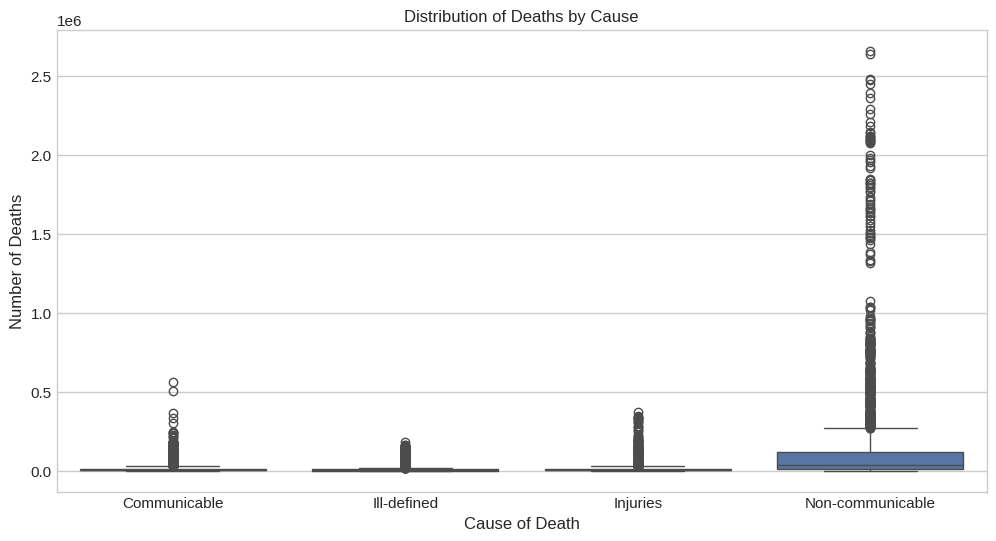

In [42]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Prepare the data for ANOVA
# Assume columns 'Number_com', 'Number_ill', 'Number', 'Number_noncom' correspond to communicable, ill-defined, injuries, and non-communicable respectively

# We'll create a long-format DataFrame suitable for ANOVA and plotting
long_format_df = pd.DataFrame({
    'Cause of Death': ['Communicable']*len(filtered_data) + ['Ill-defined']*len(filtered_data) + ['Injuries']*len(filtered_data) + ['Non-communicable']*len(filtered_data),
    'Deaths': pd.concat([filtered_data['Number_com'], filtered_data['Number_ill'], filtered_data['Number'], filtered_data['Number_noncom']])
})

# Performing ANOVA
anova_result = stats.f_oneway(
    filtered_data['Number_com'].dropna(),
    filtered_data['Number_ill'].dropna(),
    filtered_data['Number'].dropna(),
    filtered_data['Number_noncom'].dropna()
)

print(f"ANOVA F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.5f}")

# Interpreting results
if anova_result.pvalue < 0.05:
    print("We reject the null hypothesis - there is a significant difference in the mean number of deaths across causes.")
else:
    print("We do not reject the null hypothesis - there is no significant difference in the mean number of deaths across causes.")

# Boxplot for visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cause of Death', y='Deaths', data=long_format_df)
plt.title('Distribution of Deaths by Cause')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.show()


ANOVA F-statistic: 61.30, p-value: 0.00000
We reject the null hypothesis - there is a significant difference in death rates from NCDs across regions.


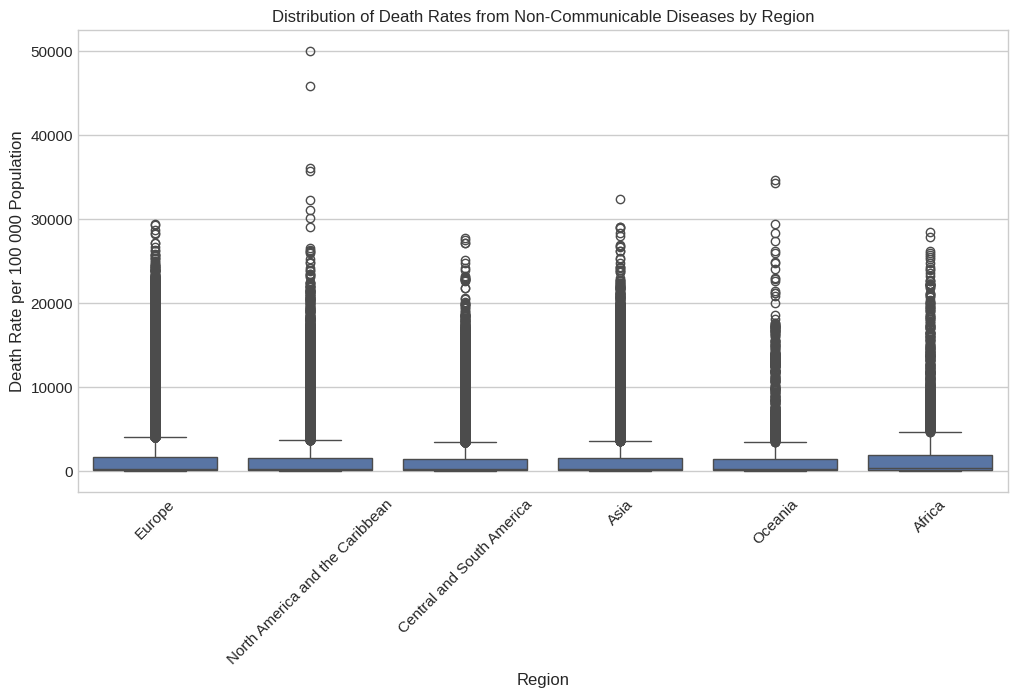

In [43]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filtering data for analysis on non-communicable diseases across regions
ncd_data = noncom_deaths[(noncom_deaths['Age Group'] != '[All]') & (noncom_deaths['Sex'] != 'All')]  # Assuming you filter out summary rows

# Performing ANOVA on the death rate from non-communicable diseases across different regions
anova_result = stats.f_oneway(*(ncd_data[ncd_data['Region Name'] == region]['Death rate per 100 000 population'] for region in ncd_data['Region Name'].unique()))

print(f"ANOVA F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.5f}")

# Interpreting results
if anova_result.pvalue < 0.05:
    print("We reject the null hypothesis - there is a significant difference in death rates from NCDs across regions.")
else:
    print("We do not reject the null hypothesis - there is no significant difference in death rates from NCDs across regions.")

# Boxplot for visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region Name', y='Death rate per 100 000 population', data=ncd_data)
plt.title('Distribution of Death Rates from Non-Communicable Diseases by Region')
plt.xlabel('Region')
plt.ylabel('Death Rate per 100 000 Population')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset
# df = pd.read_csv('path_to_your_data.csv')

# Step 1: Data Preparation
# Assuming 'df' is your DataFrame and it's already loaded with the necessary columns

# Handle categorical data with one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Region Name', 'Sex', 'Age Group'], drop_first=True)

# Selecting predictor variables and the target variable
X = df_encoded.drop(columns=['Death rate per 100 000 population', 'Country Name', 'Year'])
y = df_encoded['Death rate per 100 000 population']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Step 2: Create the Model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Step 3: Evaluate the Model
print(results.summary())


In [47]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is already loaded with your data as described

# Data Preparation
# Encoding categorical variables
df_encoded = pd.get_dummies(merged_deaths_df, columns=['Region Name', 'Country Name', 'Sex', 'Age Group'], drop_first=True)

# Select predictors and the target variable
predictors = df_encoded.drop(columns=['Total_Deaths', 'Year'])  # Exclude Year if it's not considered relevant
target = df_encoded['Total_Deaths']

# Check for and handle non-numeric columns in predictors and target
predictors = predictors.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert non-numeric to NaN, then fill with 0
target = target.apply(pd.to_numeric, errors='coerce').fillna(0)

# Add a constant to the model (for the intercept)
X = sm.add_constant(predictors)
y = target

# Model Building
model = sm.OLS(y, X).fit()

# Model Evaluation
print(model.summary())
# Add a constant to the model (for the intercept)
X = sm.add_constant(predictors)
y = target

# Model Building
model = sm.OLS(y, X).fit()

# Model Evaluation
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [48]:
np.asarray(X)

array([[1.0, 2994.0, 17.28038786, ..., False, False, True],
       [1.0, 1421.0, 57.78771858, ..., False, False, False],
       [1.0, 656.0, 53.11740891, ..., False, False, False],
       ...,
       [1.0, 600.0, 16.51527663, ..., False, False, False],
       [1.0, 566.0, 16.54003507, ..., True, False, False],
       [1.0, 807.0, 16.08530995, ..., False, True, False]], dtype=object)

In [46]:
merged_deaths_df

,Region Name,Country Name,Year,Sex,Age Group,Number_com,Percentage of cause-specific deaths out of total deaths_com,Death rate per 100 000 population_com,Number_ill,Percentage of cause-specific deaths out of total deaths_ill,Death rate per 100 000 population_ill,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population,Number_noncom,Percentage of cause-specific deaths out of total deaths_noncom,Death rate per 100 000 population_noncom,Total_Deaths
0,Europe,Albania,1987,All,[All],2994.0,17.280388,97.331036,2913.0,16.812882,94.697832,736.0,4.247951,23.926400,10683.0,61.658779,347.290400,17326.0
1,Europe,Albania,1987,All,[0],1421.0,57.787719,1763.027295,627.0,25.498170,777.915633,41.0,1.667344,50.868486,370.0,15.046767,459.057072,2459.0
2,Europe,Albania,1987,All,[1-4],656.0,53.117409,229.370629,247.0,20.000000,86.363636,77.0,6.234818,26.923077,255.0,20.647773,89.160839,1235.0
3,Europe,Albania,1987,All,[5-9],36.0,17.821782,10.807565,71.0,35.148515,21.314920,44.0,21.782178,13.209246,51.0,25.247525,15.310718,202.0
4,Europe,Albania,1987,All,[10-14],21.0,15.555556,6.643467,45.0,33.333333,14.236001,34.0,25.185185,10.756090,35.0,25.925926,11.072445,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184034,Asia,Saudi Arabia,2021,Female,[65-69],475.0,18.081462,333.384803,488.0,18.576323,342.509019,63.0,2.398173,44.217353,1601.0,60.944043,1123.682253,2627.0
184035,Asia,Saudi Arabia,2021,Female,[70-74],538.0,17.838196,600.895759,535.0,17.738727,597.545039,71.0,2.354111,79.300370,1872.0,62.068966,2090.849184,3016.0
184036,Asia,Saudi Arabia,2021,Female,[75-79],600.0,16.515277,943.841435,624.0,17.175888,981.595092,73.0,2.009359,114.834041,2336.0,64.299477,3674.689319,3633.0
184037,Asia,Saudi Arabia,2021,Female,[80-84],566.0,16.540035,1462.192255,620.0,18.118060,1601.694696,72.0,2.104033,186.003255,2164.0,63.237873,5590.431166,3422.0
